# Gensim 라이브러리 설치
- 자연어를 벡터로 변환하는데 대부분의 편의기능을 제공하는 라이브러리
- Gensim은 토픽 모델링을 위한 꽤나 효율적인 NLP 도구들의 모음

In [1]:
!pip install --user gensim==3.8.3
!pip install nltk

     |████████████████████████████████| 24.2 MB 2.1 MB/s 


# 라이브러리 import

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Corpus 

In [2]:
corpus = ['I have a dream that one day this nation will rise up and live out the true meaning of its creed We hold these truths to be self evident that all men are created equal',
'I have a dream that one day on the red hills of Georgia the sons of former slaves and the sons of former slave owners will be able to sit down together at the table of brotherhood',
'I have a dream that one day even the state of Mississippi a state sweltering with the heat of injustice sweltering with the heat of oppression will be transformed into an oasis of freedom and justice',
'I have a dream that my four little children will one day live in a nation where they will not be judged by the color of their skin but by the content of their character',
'I have a dream today',
'king is a strong man',
'queen is a wise woman',
'boy is a young man',
'girl is a young woman',
'prince is a young king',
'princess is a young queen',
'man is strong',
'woman is pretty',
'prince is a boy will be king',
'princess is a girl will be queen']

# Corpus 정제
- stopwords 제거한 문장 만들기

In [12]:
stopwords = stopwords.words('english')
# nltk 불용어 선언

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
cleaned_corpus = []
for sentence in corpus:
  filtered_tokens = [token for token in word_tokenize(sentence) if token.lower() not in stopwords]
  cleaned_corpus.append(' '.join(filtered_tokens))

In [16]:
cleaned_corpus

['dream one day nation rise live true meaning creed hold truths self evident men created equal',
 'dream one day red hills Georgia sons former slaves sons former slave owners able sit together table brotherhood',
 'dream one day even state Mississippi state sweltering heat injustice sweltering heat oppression transformed oasis freedom justice',
 'dream four little children one day live nation judged color skin content character',
 'dream today',
 'king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [17]:
w2v_input = [sentence.split() for sentence in cleaned_corpus]

In [18]:
from gensim.models import Word2Vec

w2v = Word2Vec(sentences = w2v_input, # list of list로 넘겨줘야 함
               size = 2, # 임베딩된 벡터의 차원, 실제로 데이터프레임으로 나오는 차원(열)의 개수
               window = 3, # 컨텍스트의 윈도우 크기
               min_count = 1, # 단어 최소 빈도 수 제한(빈도수가 낮은 단어는 학습하지 않음)
               sg = 1) # sg = 1 : skip-gram, sg = 0 : cbow

In [19]:
# 단어 벡터 구하기
wv = w2v.wv
vocabs = wv.vocab.keys()
word_vectors = [wv[v] for v in vocabs]

In [20]:
vocabs

dict_keys(['dream', 'one', 'day', 'nation', 'rise', 'live', 'true', 'meaning', 'creed', 'hold', 'truths', 'self', 'evident', 'men', 'created', 'equal', 'red', 'hills', 'Georgia', 'sons', 'former', 'slaves', 'slave', 'owners', 'able', 'sit', 'together', 'table', 'brotherhood', 'even', 'state', 'Mississippi', 'sweltering', 'heat', 'injustice', 'oppression', 'transformed', 'oasis', 'freedom', 'justice', 'four', 'little', 'children', 'judged', 'color', 'skin', 'content', 'character', 'today', 'king', 'strong', 'man', 'queen', 'wise', 'woman', 'boy', 'young', 'girl', 'prince', 'princess', 'pretty'])

In [21]:
word_vectors

[array([-0.19206342,  0.19867516], dtype=float32),
 array([0.16150378, 0.06036997], dtype=float32),
 array([-0.01084131, -0.00132363], dtype=float32),
 array([ 0.07778882, -0.18783548], dtype=float32),
 array([-0.08471853, -0.15931724], dtype=float32),
 array([-0.18338324, -0.15532719], dtype=float32),
 array([-0.08929098,  0.01458513], dtype=float32),
 array([0.16184488, 0.23610666], dtype=float32),
 array([0.1261901 , 0.08356634], dtype=float32),
 array([0.03671123, 0.15915863], dtype=float32),
 array([-0.00814197, -0.03393954], dtype=float32),
 array([-0.20896518, -0.11375125], dtype=float32),
 array([0.23498528, 0.0287775 ], dtype=float32),
 array([-0.20684059, -0.10196395], dtype=float32),
 array([-0.15171243, -0.09717955], dtype=float32),
 array([ 0.03075117, -0.16034217], dtype=float32),
 array([-0.10758588,  0.04726163], dtype=float32),
 array([-0.24010867,  0.02925891], dtype=float32),
 array([-0.22616178,  0.05696703], dtype=float32),
 array([-0.14834814, -0.20280503], dtype=

In [22]:
display(wv.vectors)
display(wv.vectors.shape)

array([[-0.19206342,  0.19867516],
       [ 0.16150378,  0.06036997],
       [-0.01084131, -0.00132363],
       [-0.18223636, -0.1108311 ],
       [ 0.07988247,  0.1898703 ],
       [-0.13850422, -0.01512175],
       [-0.03250776, -0.10773593],
       [ 0.12710908, -0.00908468],
       [ 0.07778882, -0.18783548],
       [-0.18338324, -0.15532719],
       [-0.14834814, -0.20280503],
       [-0.18644644, -0.06103548],
       [ 0.07313731,  0.05906459],
       [ 0.02904767, -0.25152412],
       [ 0.17453352,  0.12872341],
       [ 0.16512267,  0.01749317],
       [-0.04119846,  0.2043692 ],
       [ 0.00648836,  0.02260984],
       [-0.0256092 ,  0.1758285 ],
       [-0.24517174,  0.21083245],
       [-0.08471853, -0.15931724],
       [-0.08929098,  0.01458513],
       [ 0.16184488,  0.23610666],
       [ 0.1261901 ,  0.08356634],
       [ 0.03671123,  0.15915863],
       [-0.00814197, -0.03393954],
       [-0.20896518, -0.11375125],
       [ 0.23498528,  0.0287775 ],
       [-0.20684059,

(61, 2)

In [23]:
wv['table']

array([ 0.12531433, -0.04372184], dtype=float32)

In [24]:
wv.most_similar('together')

[('rise', 0.9999474883079529),
 ('sons', 0.9912269115447998),
 ('queen', 0.9788698554039001),
 ('truths', 0.9654743075370789),
 ('content', 0.955202579498291),
 ('live', 0.9326680302619934),
 ('today', 0.9019180536270142),
 ('slave', 0.8869200944900513),
 ('owners', 0.8797080516815186),
 ('created', 0.8765702247619629)]

In [25]:
wv.most_similar(positive = 'one', topn = 5)

[('oppression', 0.999932050704956),
 ('creed', 0.974299967288971),
 ('evident', 0.9723139405250549),
 ('strong', 0.9683732390403748),
 ('heat', 0.9616737365722656)]

# PCA를 통한 Embedding plot 확인

In [26]:
def plot_graph(vocabs, x, y):
  plt.figure(figsize=(15, 10))
  plt.scatter(x, y, marker='o')
  for i, v in enumerate(vocabs):
    plt.annotate(v, xy = (x[i], y[i]))

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors)
xs = xys[:, 0]
ys = xys[:, 1]

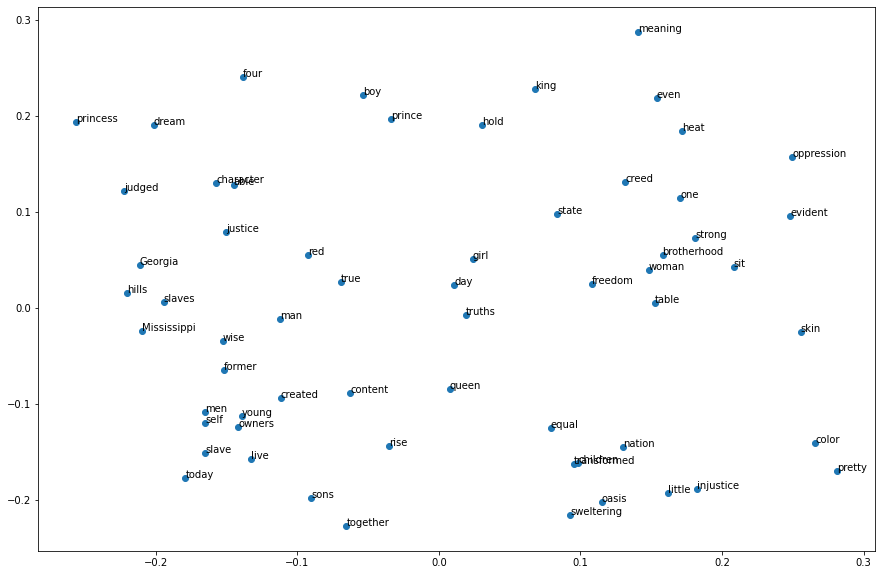

In [28]:
plot_graph(vocabs, xs, ys)

# Pretrained WordVec 실습

1) LOAD pre-trained key vector 

외부에서 이미 학습된 key-vector, PreTrained Keyvector를 가져옵니다.

In [37]:
# 미리 학습된 모델과 병합
from gensim import models

googleNews_filepath = '/content/drive/MyDrive/bitamin/week6_Word Embedding & Transfer Learning/preview/GoogleNews-vectors-negative300-SLIM.bin.gz'

# 1) Load pre-trained key vector
# model을 load한 것이 아니므로 바로 training 불가능
GoogleModel = models.KeyedVectors.load_word2vec_format(
    googleNews_filepath, binary=True, limit=500)

2) MAKE new word2vec model:

우리가 사용할 새로운 word2vec model, Transfered Model을 만들어줍니다.

In [39]:
import gensim

# 2) MAKE new word2vec model
# PreTrainedKeyVector와 'vector_size'가 같은 word2vec model을 생성
TransferedModel = gensim.models.Word2Vec(
    size=GoogleModel.vector_size, min_count=1)

3) BUILD vocab by PreTrained Keyvector word Vocabulary:

TransferedModel의 vocab을 우선 데이터 sentences로 업데이트해줍니다.

In [40]:
# 3) BUILD vocab by PreTrainedKeyvector word Vocabulary
# TransferedModell.build_vocab([[]]) # list of list
# list of list로 넘겨줘야 함
TransferedModel.build_vocab([GoogleModel.wv.vocab.keys()])

4) Update vocab by sentences(corpus)

PreTrained Keyvector로부터 vocab을 update

In [41]:
# 4) Update vocab by sentences(corpus)
# update parameter를 True로 설정
TransferedModel.build_vocab(w2v_input, update=True)

5) INITIALIZED word vector

PreTrined Keyvector의 word vector들을 Transfered Model에 update

In [42]:
# 5) INITIALIZED word vector
# vocab에 있는 단어들의 vector를 'googleNews_filepath'에 있는 값으로 모두 업데이트해줌
# lockf=1.0 : 보통은 vector를 update하지 못하도록 lock이 걸려있는데, 여기서는 풀어줌.
TransferedModel.intersect_word2vec_format(
    googleNews_filepath, binary=True, lockf=1.0)

6) Train new data set

- 새로운 데이터 sentences를 업데이트하면서 조정

In [43]:
print("== Before New data training")
print(TransferedModel.wv['dream'][:10])

== Before New data training
[-0.02404145 -0.0326838   0.04179756  0.00726743  0.08862339 -0.01579193
  0.07165296  0.01759897  0.00659961  0.0135135 ]


In [44]:
# 6) TRAIN new dataset (위에서 사용했던 dataset)
TransferedModel.train(w2v_input, total_examples=len(w2v_input), epochs=100)

(2892, 9400)

In [45]:
print("== After New data training")
print(TransferedModel.wv['dream'][:10])

== After New data training
[-0.01895188 -0.02842075  0.0468545   0.01555905  0.08886573 -0.01789889
  0.07957602  0.01148782  0.0138294   0.02324139]
